In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import glob
import xarray as xr

import grid

%matplotlib inline

In [2]:
base = '/ocean/nsoontie/MEOPAR/LiveOcean/*/*UBC.nc'
files = glob.glob(base)
files.sort()

In [3]:
d = xr.open_dataset(files[0])
for f in files[1:]:
    with xr.open_dataset(f) as d1:
        d =xr.concat([d,d1],dim='ocean_time',data_vars='minimal')

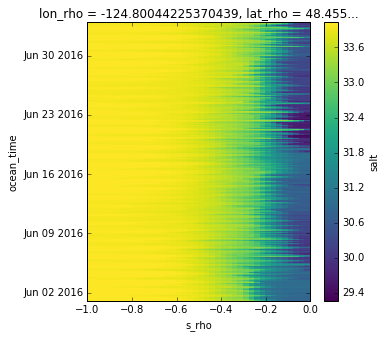

In [4]:
j=10
i=10
salt_ts = d.salt.sel(eta_rho=j,xi_rho=i)
fig, ax = plt.subplots(figsize=(5, 5))
salt_ts.plot(ax=ax)

## Surface salintiy

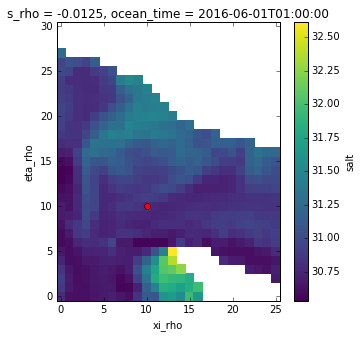

In [5]:
## Using sel in vertical instead of isel to select based on value
t = 0
s = 0
fig, ax = plt.subplots(figsize=(5, 5))
salt_surface = (
               d.salt.isel(ocean_time=t)
               .sel(s_rho=s,method='nearest')
)
salt_surface.plot(ax=ax)
ax.plot(i,j, 'ro')

### Bottom Salinity

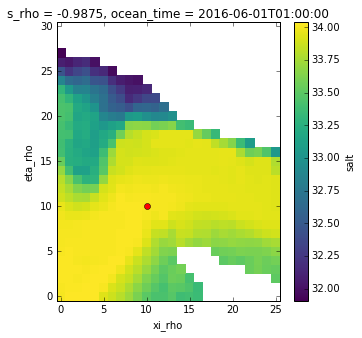

In [6]:
## Using isel in vertical instead of sel to select based on index
t = 0
s = 0
fig, ax = plt.subplots(figsize=(5, 5))
salt_bottom = (
               d.salt.isel(ocean_time=t,s_rho=s)
)
salt_bottom.plot(ax=ax)
ax.plot(i,j, 'ro')

Be careful! There is a dimension and a variable named s_rho:
* s_rho the dimension takes values 0 to 39, ie., indices BUT it starts at the bottom. So s_rho (dimension)=0 means bottom and s_rho(dimension) = 39 means surface
* s_rho the variable contains 40 values between -1 and 0. s_rho (variable) =0 means surface and s_rho (variable) = -1 means bottom

In [7]:
d.s_rho

<xarray.DataArray 's_rho' (s_rho: 40)>
array([-0.9875, -0.9625, -0.9375, -0.9125, -0.8875, -0.8625, -0.8375,
       -0.8125, -0.7875, -0.7625, -0.7375, -0.7125, -0.6875, -0.6625,
       -0.6375, -0.6125, -0.5875, -0.5625, -0.5375, -0.5125, -0.4875,
       -0.4625, -0.4375, -0.4125, -0.3875, -0.3625, -0.3375, -0.3125,
       -0.2875, -0.2625, -0.2375, -0.2125, -0.1875, -0.1625, -0.1375,
       -0.1125, -0.0875, -0.0625, -0.0375, -0.0125])
Coordinates:
  * s_rho    (s_rho) float64 -0.9875 -0.9625 -0.9375 -0.9125 -0.8875 -0.8625 ...
Attributes:
    standard_name: ocean_s_coordinate_g1
    valid_min: -1.0
    valid_max: 0.0
    field: s_rho, scalar
    long_name: S-coordinate at RHO-points
    positive: up
    formula_terms: s: s_rho C: Cs_r eta: zeta depth: h depth_c: hc

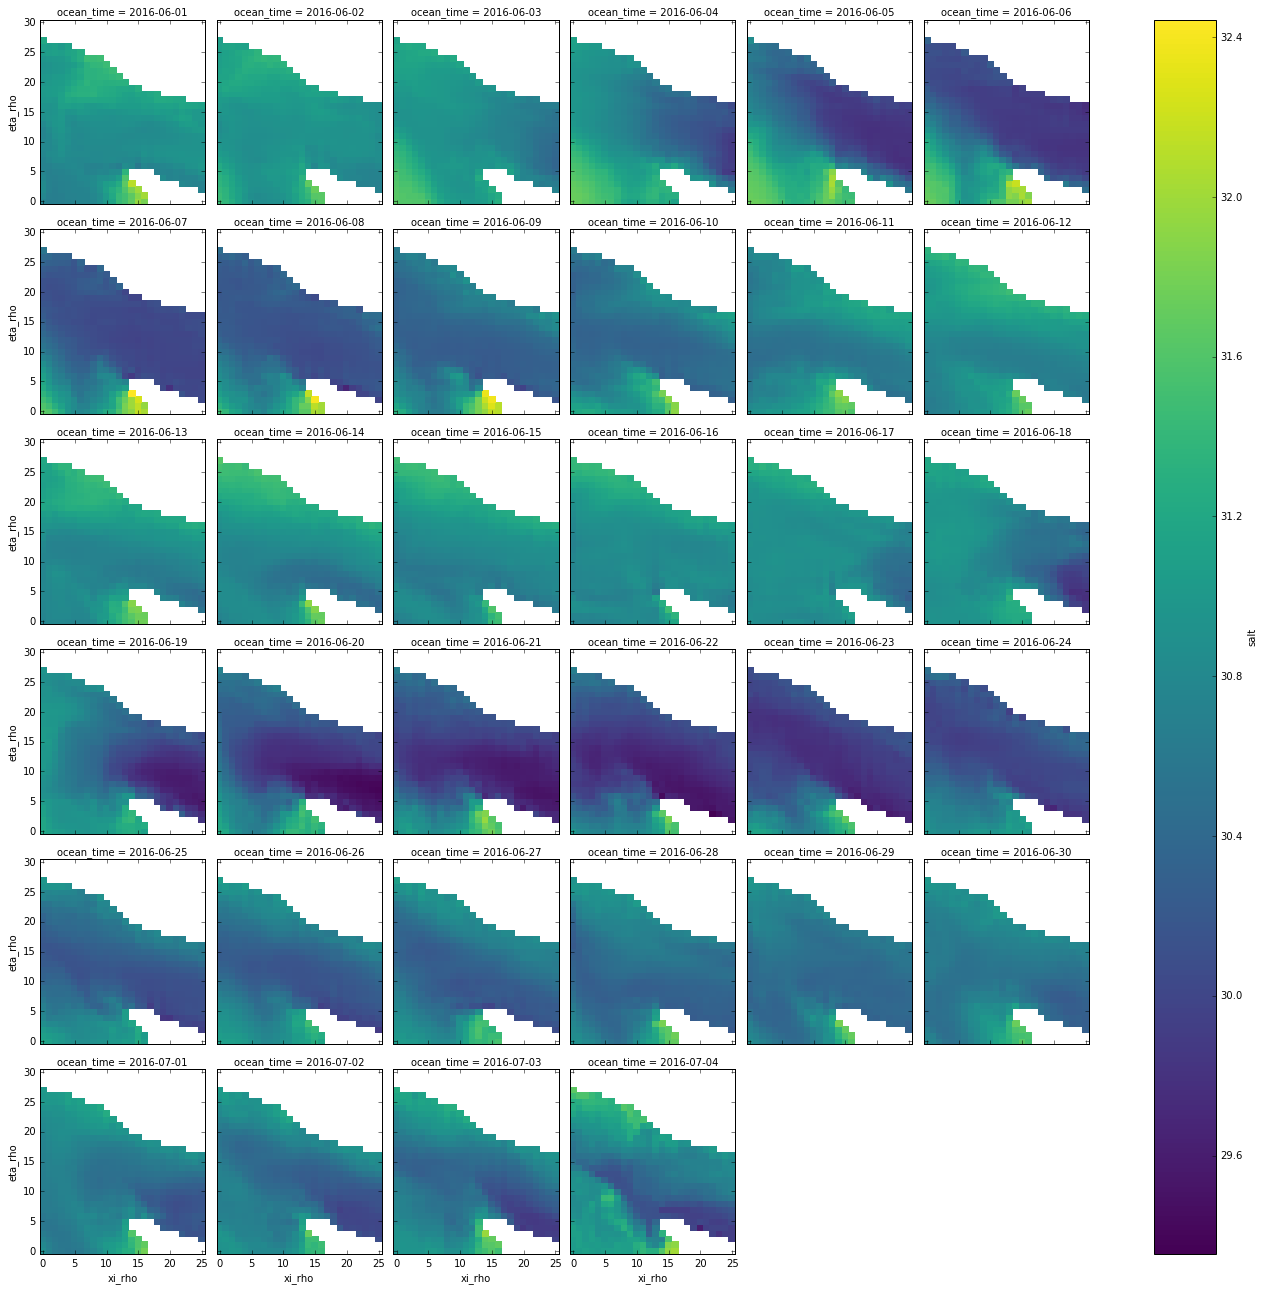

In [8]:
salt_surf_daily_avg = (
            d.salt.sel(s_rho=s,method='nearest')).resample('1D',dim='ocean_time')
g_simple = salt_surf_daily_avg.plot(x='xi_rho', y='eta_rho', col='ocean_time', col_wrap=6)

Because of the way I orgnanized the files, the first panel only has 23 hours of results and the last panel has one hour. It maybe be better to time_slice and then daily average.

In [9]:
d

<xarray.Dataset>
Dimensions:     (eta_rho: 31, eta_u: 31, eta_v: 30, ocean_time: 792, s_rho: 40, xi_rho: 26, xi_u: 25, xi_v: 26)
Coordinates:
    lon_rho     (eta_rho, xi_rho) float64 -125.0 -125.0 -125.0 -124.9 -124.9 ...
    lat_rho     (eta_rho, xi_rho) float64 48.32 48.32 48.32 48.32 48.32 ...
  * s_rho       (s_rho) float64 -0.9875 -0.9625 -0.9375 -0.9125 -0.8875 ...
    lon_u       (eta_u, xi_u) float64 -125.0 -125.0 -125.0 -124.9 -124.9 ...
    lat_u       (eta_u, xi_u) float64 48.32 48.32 48.32 48.32 48.32 48.32 ...
    lon_v       (eta_v, xi_v) float64 -125.0 -125.0 -125.0 -124.9 -124.9 ...
    lat_v       (eta_v, xi_v) float64 48.32 48.32 48.32 48.32 48.32 48.32 ...
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * eta_u       (eta_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * eta_v       (eta_v) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 1